In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',100)

In [111]:
dt=pd.read_csv("forecast_Quartile.csv")

In [95]:
dk=pd.read_csv("D_Driver.csv")

In [4]:
dt.head()

,at_estimates.ID,at_estimates.Observation,at_estimates.nor,at_estimates.acc,at_estimates.brk,at_estimates.lc,at_estimates.chosen,Target,Unnamed: 8,Unnamed: 9,...,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105
0,11,1,0.209451,0.309346,0.471415,0.009788,0.471415,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,2,0.212908,0.309026,0.468040,0.010026,0.468040,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,3,0.222120,0.296580,0.461648,0.019652,0.461648,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,4,0.227626,0.300748,0.455734,0.015893,0.455734,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,5,0.226476,0.314263,0.451806,0.007455,0.451806,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
dt['max_prob']=0

In [113]:
def get_max_val(a,b,c,d,e):
    return max(a,b,c,d,e)

In [115]:
for i in range(len(dt)):
    dt['max_prob'].loc[i]=get_max_val(dt['at_estimates.nor'][i],dt['at_estimates.acc'][i],dt['at_estimates.brk'][i],dt['at_estimates.llc'][i],dt['at_estimates.rlc'][i])

In [103]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11996 entries, 0 to 11995
Columns: 107 entries, at_estimates.ID to max_prob
dtypes: float64(104), int64(3)
memory usage: 9.8 MB


In [9]:
dt


,at_estimates.ID,at_estimates.Observation,at_estimates.nor,at_estimates.acc,at_estimates.brk,at_estimates.lc,at_estimates.chosen,Target,Unnamed: 8,Unnamed: 9,...,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,max_prob
0,11,1,0.209451,0.309346,0.471415,0.009788,0.471415,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.471415
1,11,2,0.212908,0.309026,0.468040,0.010026,0.468040,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468040
2,11,3,0.222120,0.296580,0.461648,0.019652,0.461648,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461648
3,11,4,0.227626,0.300748,0.455734,0.015893,0.455734,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.455734
4,11,5,0.226476,0.314263,0.451806,0.007455,0.451806,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.451806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11991,62,910,0.196709,0.429050,0.331404,0.042837,0.331404,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.429050
11992,62,911,0.163488,0.327049,0.452146,0.057317,0.452146,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.452146
11993,62,912,0.162411,0.445407,0.252908,0.139274,0.252908,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445407
11994,62,913,0.150914,0.323197,0.515657,0.010232,0.515657,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.515657


In [117]:
dt.loc[(dt['at_estimates.chosen'] == dt['at_estimates.nor'] ), 'Target'] =0
dt.loc[(dt['at_estimates.chosen'] == dt['at_estimates.acc'] ), 'Target'] =1
dt.loc[(dt['at_estimates.chosen'] == dt['at_estimates.brk'] ), 'Target'] =2
dt.loc[(dt['at_estimates.chosen'] == dt['at_estimates.llc'] ), 'Target'] =3
dt.loc[(dt['at_estimates.chosen'] == dt['at_estimates.rlc'] ), 'Target'] =4

In [119]:
dt.loc[(dt['max_prob'] == dt['at_estimates.nor'] ), 'Predicted_Choice'] =0
dt.loc[(dt['max_prob'] == dt['at_estimates.acc'] ), 'Predicted_Choice'] =1
dt.loc[(dt['max_prob'] == dt['at_estimates.brk'] ), 'Predicted_Choice'] =2
dt.loc[(dt['max_prob'] == dt['at_estimates.llc'] ), 'Predicted_Choice'] =3
dt.loc[(dt['max_prob'] == dt['at_estimates.rlc'] ), 'Predicted_Choice'] =4



In [120]:
dt.head()

,at_estimates.ID,at_estimates.Observation,at_estimates.nor,at_estimates.acc,at_estimates.brk,at_estimates.llc,at_estimates.rlc,at_estimates.chosen,Unnamed: 8,Unnamed: 9,...,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,max_prob,Target,Predicted_Choice
0,11,1,0.208974,0.309240,0.472015,0.007192,0.002579,0.472015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.472015,2.0,2.0
1,11,2,0.212460,0.308939,0.468667,0.007264,0.002670,0.468667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468667,2.0,2.0
2,11,3,0.223110,0.297968,0.465043,0.006295,0.007585,0.465043,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465043,2.0,2.0
3,11,4,0.228124,0.301583,0.458032,0.006842,0.005418,0.458032,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.458032,2.0,2.0
4,11,5,0.225394,0.313455,0.451098,0.008389,0.001664,0.451098,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.451098,2.0,2.0


In [103]:
len(dt['Predicted_Choice'])

11996

In [104]:
len(dt['Target'])

11996

In [94]:
dt.dtypes

at_estimates.ID               int64
at_estimates.Observation      int64
at_estimates.nor            float64
at_estimates.acc            float64
at_estimates.brk            float64
                             ...   
draws.lc.30                 float64
draws.chosen.30             float64
max_prob                    float64
Predicted_Choice            float64
Target                        int64
Length: 160, dtype: object

In [121]:
dt= dt.astype({"Predicted_Choice":'int'}) 

In [30]:
dt.dtypes


at_estimates.ID               int64
at_estimates.Observation      int64
at_estimates.nor            float64
at_estimates.acc            float64
at_estimates.brk            float64
at_estimates.llc            float64
at_estimates.rlc            float64
at_estimates.chosen         float64
Target                        int64
Predicted_Choice              int32
match                       float64
dtype: object

In [123]:
dt.loc[(dt['Target']==dt['Predicted_Choice']),'match']=1
dt.loc[(dt['Target']!=dt['Predicted_Choice']),'match']=0

In [132]:
dt['match'][dt['Target']==0].value_counts()

1.0    5696
0.0     225
Name: match, dtype: int64

In [124]:
dt.groupby('Target')['match'].value_counts()

Target  match
0.0     0.0      2984
1.0     0.0      3573
        1.0       290
2.0     1.0      4526
        0.0       335
3.0     0.0       122
4.0     0.0       111
        1.0        55
Name: match, dtype: int64

## Rest Codeeee


In [96]:
dk.head()

,Timestamp,A_x,A_y,A_z,Speed,Lane_Change,No_Of_Veh,Dist_Veh,GPS,X_pos,...,Target,Driver_tag,Gender,Age,Vehicle_Flag,norm_avail,accr_avail,brek_avail,llc_avail,rlc_avail
0,12,-0.0161,-0.0209,-0.08330,78.8,0.0,0.0,999.0,77.800000,0.000,...,2,11,1,1,0.0,1,1,1,1,1
1,13,-0.0138,-0.0032,-0.32046,82.7,0.0,0.0,999.0,79.287500,0.000,...,2,11,1,1,0.0,1,1,1,1,1
2,14,-0.0044,-0.0149,-1.05350,85.5,0.0,0.0,999.0,83.050000,0.300,...,2,11,1,1,0.0,1,1,1,1,1
3,15,-0.0015,-0.0042,-0.59388,85.7,0.0,0.0,999.0,85.540000,0.178,...,2,11,1,1,0.0,1,1,1,1,1
4,16,0.0147,-0.0144,-0.19306,85.5,0.0,0.0,999.0,85.655556,-0.191,...,2,11,1,1,0.0,1,1,1,1,1


In [28]:
dt.headd()

,at_estimates.ID,at_estimates.Observation,at_estimates.nor,at_estimates.acc,at_estimates.brk,at_estimates.lc,at_estimates.chosen,Target,Unnamed: 8,Unnamed: 9,...,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,max_prob,Predicted_Choice,match
0,11,1,0.209451,0.309346,0.471415,0.009788,0.471415,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.471415,2.0,1.0
1,11,2,0.212908,0.309026,0.468040,0.010026,0.468040,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468040,2.0,1.0
2,11,3,0.222120,0.296580,0.461648,0.019652,0.461648,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461648,2.0,1.0
3,11,4,0.227626,0.300748,0.455734,0.015893,0.455734,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.455734,2.0,1.0
4,11,5,0.226476,0.314263,0.451806,0.007455,0.451806,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.451806,2.0,1.0


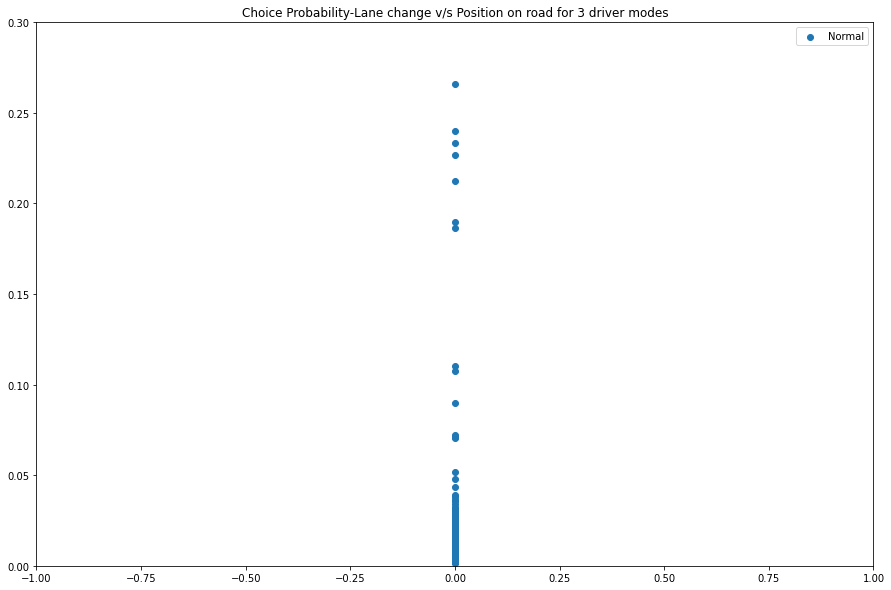

In [97]:
plt.figure(figsize=(15,10)) 
plt.scatter(dk['Gender'][df['Driver_tag']==41],dt['at_estimates.lc'][dt['at_estimates.ID']==41],label='Normal')
#plt.scatter(dk['Age'][df['Driver_tag']==33],dt['at_estimates.lc'][dt['at_estimates.ID']==33],label='Drowsy')
#plt.scatter(dk['X_pos'][df['Driver_tag']==52],dt['at_estimates.lc'][dt['at_estimates.ID']==52],label='Aggressive')
plt.legend(loc="upper right")
plt.xlim(-1,1)
plt.ylim(0,0.3)
plt.title('Choice Probability-Lane change v/s Position on road for 3 driver modes')
plt.show()

In [66]:
dt['at_estimates.lc'][dt['at_estimates.ID']==41].max()

0.314848365